In [52]:
from typing import Type

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as sp
from sympy import Function, dsolve, Eq
from sympy.abc import x, y, z

from methods import F, Euler

# Параметры решения

**$f$ - исходная функция**  
$y'=f(x,y)$


In [53]:
# Или символьно через SymPy
y = Function("y")
eq = Eq(y(x).diff(x), sp.sin(x)**2 * y(x))

In [54]:
dx = 1e-2
x0, y0 = 0, 0.1
x1 = 10
n = abs(int((x1 - x0) / dx))


## Построение графика

In [60]:
def plot(exact: F, f: F, x0: float, y0: float, n: int = 1000, dx: float = 1e-2, *, method: Type[F] = Euler):
    space = np.linspace(x0, round(dx * n), n)
    Y = exact(space)
    plt.plot(space, Y, label="Exact")
    T = method(f, x0, y0, n, dx)
    plt.plot(T[:, 0], T[:, 1], label=method.__name__, linestyle='--')
    T = odeint(f, y0, space, tfirst=True)
    plt.plot(space, T, label="Scikit", linestyle='--')
    
    plt.legend()
    plt.show()

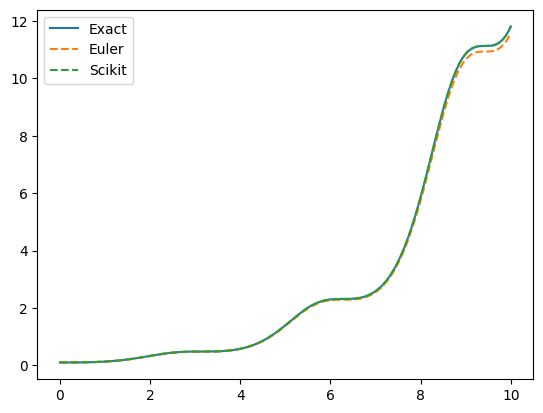

In [61]:
solution = dsolve(eq, y(x), ics={y(x0): y0})
exact = sp.lambdify(x, solution.rhs, "numpy")

f = sp.lambdify((x, z), eq.rhs.subs(y(x), z))
plot(exact, f, x0, y0, n, dx, method=Euler)